# Datasets and DataLoaders

Imports

In [ ]:
import os

import torch
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor
from torchvision import datasets
from torchvision.io import read_image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

## Loading a dataset

In [ ]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:00<00:00, 139261174.84it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 6377234.83it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 64771490.31it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 20882279.49it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Iterating and visualizing the dataset

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

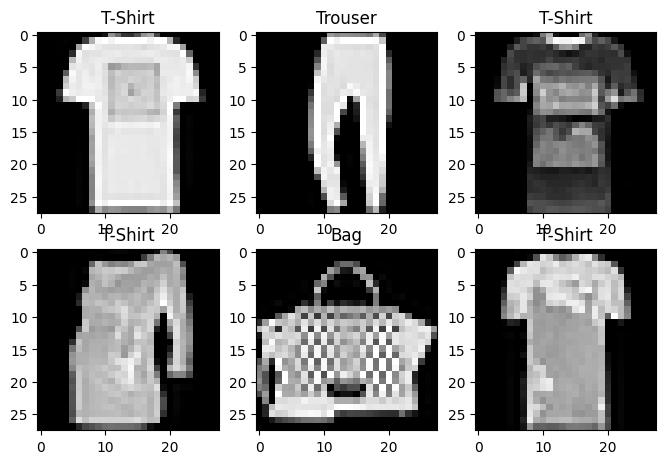

In [ ]:
figure = plt.figure(figsize=(8,8,))
subplot_width, subplot_height = 3, 3

for plot_idx in range(1, subplot_width + subplot_height + 1):
  # Get the piece of data
  sample_idx = torch.randint(len(training_data), size=(1, )).item()
  img, label = training_data[sample_idx]


  # Create the sub figure
  figure.add_subplot(subplot_width, subplot_height, plot_idx)
  plt.title(labels_map[label])
  plt.imshow(img.squeeze(), cmap="gray")

plt.show()

# Creating a Custom Dataset for your files

In [ ]:
class CustomImageDataset(Dataset):
  def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

  def __len__(self):
    return len(self.img_labels)

  def __getitem__(self, idx):
    # Get the image and label
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image: torch.Tensor = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]

    # Apply specified transforms
    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)

    return image, label

Prepare your data for training with DataLoaders

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Iterate through the DataLoader


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


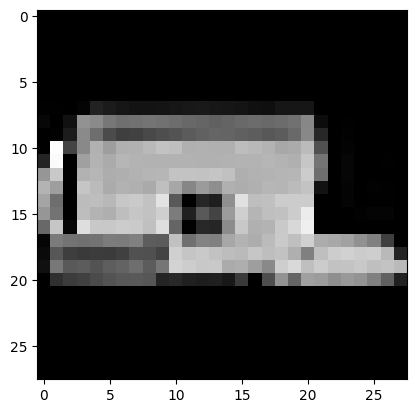

label: 8


In [ ]:
train_features, train_labels = next(iter(train_dataloader)) # Grab the current batch and move the iterator to next batch

print(f"Feature batch shape: {train_features.shape}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]

plt.imshow(img, cmap="gray")
plt.show()

print(f"label: {label}")